<h1> Stock Market investment ! </h1>

Data Tables :

## https://www.kaggle.com/karthickveerakumar/stocks-data
## https://fred.stlouisfed.org/series/NASDAQCOM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Sets:

In [3]:
#1>
stocks_cluster_data = pd.read_csv('../data/raw/StocksCluster.csv')
print(stocks_cluster_data.info())
stocks_cluster_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11580 entries, 0 to 11579
Data columns (total 12 columns):
ReturnJan      11580 non-null float64
ReturnFeb      11580 non-null float64
ReturnMar      11580 non-null float64
ReturnApr      11580 non-null float64
ReturnMay      11580 non-null float64
ReturnJune     11580 non-null float64
ReturnJuly     11580 non-null float64
ReturnAug      11580 non-null float64
ReturnSep      11580 non-null float64
ReturnOct      11580 non-null float64
ReturnNov      11580 non-null float64
PositiveDec    11580 non-null int64
dtypes: float64(11), int64(1)
memory usage: 1.1 MB
None


,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov,PositiveDec
0,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,0.024676,-0.020408,-0.173318,-0.025385,0
1,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,0.211290,-0.580003,-0.267141,-0.151235,0
2,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,0.033392,0.000000,0.091696,-0.059561,0
3,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,0.095290,0.056680,-0.096339,-0.040512,1
4,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,0.056842,0.033602,0.036269,-0.085305,1


In [4]:
#2>
NASDAQdow = pd.read_csv('../data/raw/NASDAQCOM.csv')
print(NASDAQdow.info())
NASDAQdow.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
DATE         260 non-null object
NASDAQCOM    260 non-null object
dtypes: object(2)
memory usage: 4.1+ KB
None


,DATE,NASDAQCOM
0,2016-01-04,4903.09
1,2016-01-05,4891.43
2,2016-01-06,4835.76
3,2016-01-07,4689.43
4,2016-01-08,4643.63


### Rationale:
### We have the returns from individual months as features <i>(Data Set 1)</i> along with the NASDAQ dow index for those months in <i>(Data Set 2)</i>  as another feature!
### So we add the average dow value for that month to be another feature in our data set 1 and see if that relates to our <b> PositiveDec </b> target variable!

In [5]:
NASDAQdow['NASDAQCOM'].value_counts()

.          8
4945.89    2
5211.89    1
4766.79    1
5125.91    1
5487.44    1
4821.66    1
5437.16    1
5235.03    1
4894.89    1
5089.93    1
5398.92    1
4956.76    1
4843.76    1
4869.29    1
4835.76    1
4739.12    1
5251.11    1
5257.40    1
4768.86    1
5162.13    1
5228.66    1
4534.06    1
4582.20    1
5380.68    1
5438.56    1
4707.98    1
4503.58    1
4843.93    1
4748.47    1
          ..
5249.90    1
4526.06    1
4846.62    1
4648.82    1
5412.54    1
5321.51    1
5309.83    1
5328.67    1
5318.55    1
4891.80    1
4363.14    1
5241.83    1
4800.34    1
4901.77    1
4971.36    1
4795.65    1
4903.09    1
5283.93    1
4808.87    1
5289.66    1
4817.59    1
4707.42    1
5105.57    1
5275.91    1
4848.37    1
4850.69    1
4504.24    1
4859.16    1
4948.13    1
5241.35    1
Name: NASDAQCOM, Length: 252, dtype: int64

### '.' is an undesirable value, lets drop that !

In [6]:
NASDAQdow.drop( NASDAQdow[NASDAQdow['NASDAQCOM'] == '.'].index,inplace=True )
NASDAQdow['NASDAQCOM'].value_counts()

4945.89    2
4835.76    1
4691.87    1
5125.91    1
5487.44    1
4821.66    1
5437.16    1
5235.03    1
4894.89    1
5089.93    1
5398.92    1
5034.06    1
4956.76    1
4843.76    1
4869.29    1
5211.89    1
5153.58    1
4739.12    1
5251.11    1
5257.40    1
4768.86    1
5162.13    1
5228.66    1
4534.06    1
4582.20    1
5380.68    1
5438.56    1
4707.98    1
4503.58    1
4843.93    1
          ..
5249.90    1
4526.06    1
4846.62    1
4648.82    1
5412.54    1
5321.51    1
5309.83    1
5328.67    1
5318.55    1
4891.80    1
4363.14    1
5241.83    1
4800.34    1
4901.77    1
4971.36    1
4795.65    1
4903.09    1
5283.93    1
4808.87    1
5289.66    1
4817.59    1
4707.42    1
5105.57    1
5275.91    1
4848.37    1
4850.69    1
4504.24    1
4859.16    1
4948.13    1
5241.35    1
Name: NASDAQCOM, Length: 251, dtype: int64

In [7]:
def strip(x):
    return x[5:7]

strip("2016-01-04")

'01'

In [8]:
NASDAQdow['NASDAQCOM'] = pd.to_numeric(NASDAQdow['NASDAQCOM'])
NASDAQdow['Counts'] = 0
NASDAQdow['DATE'] = NASDAQdow.DATE.apply(strip)

In [9]:
counts = (NASDAQdow['DATE'].value_counts().sort_index())
counts

01    19
02    20
03    22
04    21
05    21
06    22
07    20
08    23
09    21
10    21
11    21
12    21
Name: DATE, dtype: int64

In [10]:
NASDAQdow.head()

,DATE,NASDAQCOM,Counts
0,01,4903.09,0
1,01,4891.43,0
2,01,4835.76,0
3,01,4689.43,0
4,01,4643.63,0


In [11]:
totals = NASDAQdow.groupby(['DATE'])[["NASDAQCOM"]].sum()
totals = pd.Series(totals['NASDAQCOM'])
totals

DATE
01     87603.57
02     89264.12
03    104598.55
04    102735.53
05    100552.94
06    106837.11
07    100479.78
08    119991.88
09    110337.24
10    110375.77
11    110471.87
12    113675.45
Name: NASDAQCOM, dtype: float64

In [12]:
set2 = pd.DataFrame(totals)
set2['counts'] = counts
set2

,NASDAQCOM,counts
DATE,,
01,87603.57,19
02,89264.12,20
03,104598.55,22
04,102735.53,21
05,100552.94,21
06,106837.11,22
07,100479.78,20
08,119991.88,23
09,110337.24,21


In [13]:
set2["averageDow"] = set2["NASDAQCOM"]/set2["counts"]
set2

,NASDAQCOM,counts,averageDow
DATE,,,
01,87603.57,19,4610.714211
02,89264.12,20,4463.206000
03,104598.55,22,4754.479545
04,102735.53,21,4892.168095
05,100552.94,21,4788.235238
06,106837.11,22,4856.232273
07,100479.78,20,5023.989000
08,119991.88,23,5217.038261
09,110337.24,21,5254.154286


In [14]:
set2.drop(['NASDAQCOM','counts'],axis=1, inplace = True)

## Now we merge the 2:

In [15]:
set2 = set2.T
set2.rename(index=str, columns={"01": "ReturnJan", "02": "ReturnFeb", "03": "ReturnMar", "04": "ReturnApr", "05": "ReturnMay", "06": "ReturnJune", "07": "ReturnJuly", "08": "ReturnAug", "09": "ReturnSep", "10": "ReturnOct", "11": "ReturnNov", "12": "PositiveDec"}, inplace = True)
set2

DATE,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov,PositiveDec
averageDow,4610.714211,4463.206,4754.479545,4892.168095,4788.235238,4856.232273,5023.989,5217.038261,5254.154286,5255.989048,5260.565238,5413.116667


In [16]:
stocks_cluster_data.head()

,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov,PositiveDec
0,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,0.024676,-0.020408,-0.173318,-0.025385,0
1,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,0.211290,-0.580003,-0.267141,-0.151235,0
2,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,0.033392,0.000000,0.091696,-0.059561,0
3,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,0.095290,0.056680,-0.096339,-0.040512,1
4,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,0.056842,0.033602,0.036269,-0.085305,1


In [17]:
stock_data = stocks_cluster_data.append(set2)
stock_data

DATE,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov,PositiveDec
0,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,0.024676,-0.020408,-0.173318,-0.025385,0.000000
1,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,0.211290,-0.580003,-0.267141,-0.151235,0.000000
2,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,0.033392,0.000000,0.091696,-0.059561,0.000000
3,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,0.095290,0.056680,-0.096339,-0.040512,1.000000
4,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,0.056842,0.033602,0.036269,-0.085305,1.000000
5,0.579800,0.332252,-0.405461,-0.060000,0.060732,-0.215361,0.274447,0.538344,0.127068,-0.171429,-0.195375,1.000000
6,-0.006036,0.024291,0.018887,-0.012758,0.081489,0.105116,0.025963,-0.033469,0.068586,0.011848,-0.115920,1.000000
7,0.679187,0.793885,-0.289855,-0.156513,-0.480535,1.090131,-0.131396,0.055094,-0.393723,-0.348214,0.168649,0.000000
8,-0.040000,-0.068182,-0.121951,0.181818,0.076923,0.023256,-0.087942,-0.012000,-0.013158,0.000000,0.027382,0.000000
9,0.152088,0.051724,0.100874,-0.067273,0.000000,0.004032,0.033333,-0.020000,0.032787,-0.015873,-0.032258,0.000000


# Some Visualizations!!

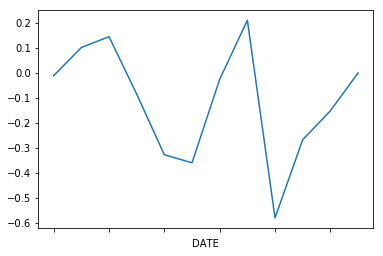

In [18]:
stock_data.iloc[1].plot()

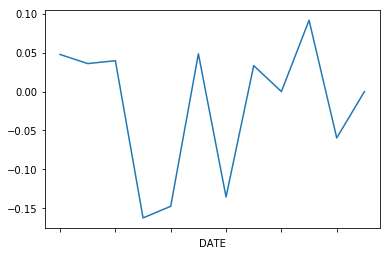

In [19]:
stock_data.iloc[2].plot()

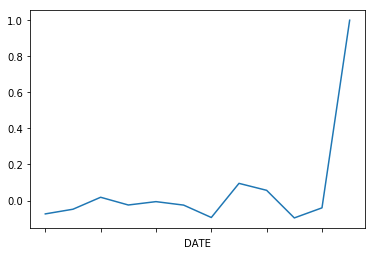

In [20]:
stock_data.iloc[3].plot()

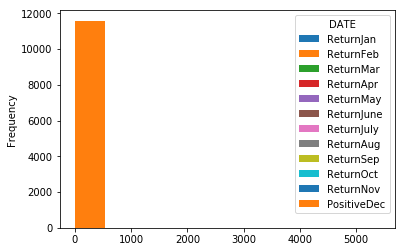

In [21]:
stock_data.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116ad0400>,
      dtype=object)

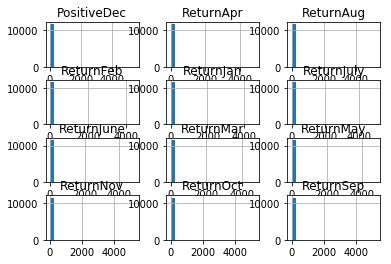

In [22]:
stock_data.hist(stacked=True, bins=20)